# ISOT Fake News Dataset - Comprehensive Exploratory Data Analysis

This notebook provides a thorough exploration of the ISOT Fake News Dataset, which contains real and fake news articles.

## Dataset Overview
The ISOT dataset consists of:
- **True.csv**: Real news articles from Reuters.com
- **Fake.csv**: Fake news articles from various unreliable websites

## Notebook Structure
1. Data Loading & Initial Inspection
2. Data Cleaning & Preprocessing
3. Statistical Analysis
4. Text Analysis
5. Temporal Analysis
6. Advanced Visualizations
7. Conclusions & Insights

In [1]:
# Install required packages
!pip install wordcloud textblob -q

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
from collections import Counter
import re
from textblob import TextBlob

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading & Initial Inspection

In [5]:
# Load the datasets
try:
    fake_df = pd.read_csv('Fake.csv')
    true_df = pd.read_csv('True.csv')
    print("✓ Data loaded successfully from local files")
except FileNotFoundError:
    print("Files not found. Please upload Fake.csv and True.csv to the notebook directory.")
    print("\nFor Google Colab, you can:")
    print("1. Upload files using the file upload button")
    print("2. Or uncomment and run the code below to upload:")
    print("\n# from google.colab import files")
    print("# uploaded = files.upload()")

✓ Data loaded successfully from local files


In [6]:
# Add labels
fake_df['label'] = 'fake'
true_df['label'] = 'true'

# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

print(f"Total articles: {len(df):,}")
print(f"Fake articles: {len(fake_df):,}")
print(f"True articles: {len(true_df):,}")

Total articles: 44,898
Fake articles: 23,481
True articles: 21,417


In [7]:
# Display basic information
print("\n=== DATASET STRUCTURE ===")
print(df.info())

print("\n=== FIRST FEW ROWS ===")
df.head()


=== DATASET STRUCTURE ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None

=== FIRST FEW ROWS ===


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",fake


In [8]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Count'] > 0])


=== MISSING VALUES ===
Empty DataFrame
Columns: [Count, Percentage]
Index: []


## 2. Data Cleaning & Preprocessing

In [9]:
# Remove duplicates
print(f"Duplicates found: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create text length features
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()
df['title_word_count'] = df['title'].str.split().str.len()
df['text_word_count'] = df['text'].str.split().str.len()

print("\n✓ Data preprocessing completed")
print(f"Final dataset size: {len(df):,} articles")

Duplicates found: 209

✓ Data preprocessing completed
Final dataset size: 44,689 articles


## 3. Statistical Analysis

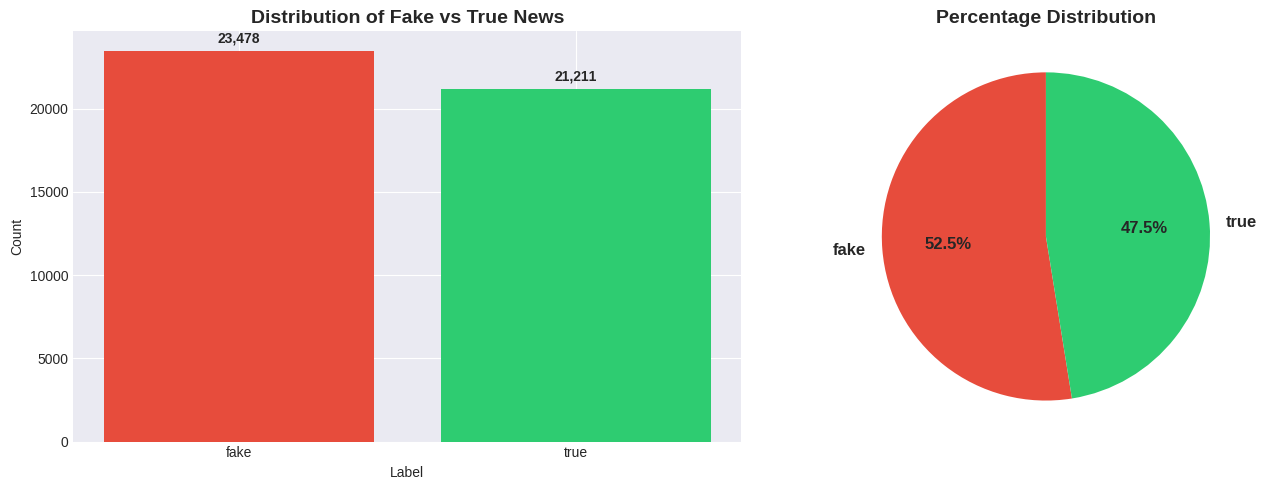

In [10]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
label_counts = df['label'].value_counts()
axes[0].bar(label_counts.index, label_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Distribution of Fake vs True News', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
colors = ['#e74c3c', '#2ecc71']
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
# Statistical summary by label
print("\n=== STATISTICAL SUMMARY BY LABEL ===")
stats_df = df.groupby('label')[['title_length', 'text_length', 'title_word_count', 'text_word_count']].describe().round(2)
print(stats_df)


=== STATISTICAL SUMMARY BY LABEL ===
      title_length                                               text_length  \
             count   mean    std   min   25%   50%    75%    max       count   
label                                                                          
fake       23478.0  94.19  27.18   8.0  77.0  90.0  105.0  286.0     23478.0   
true       21211.0  64.66   9.16  26.0  59.0  64.0   70.0  133.0     21211.0   

                                                               \
          mean      std  min     25%     50%     75%      max   
label                                                           
fake   2547.56  2533.00  1.0  1433.0  2166.0  3032.0  51794.0   
true   2378.04  1684.47  1.0   903.5  2216.0  3226.5  29781.0   

      title_word_count                                            \
                 count   mean   std  min   25%   50%   75%   max   
label                                                              
fake           23478.0  14.73  

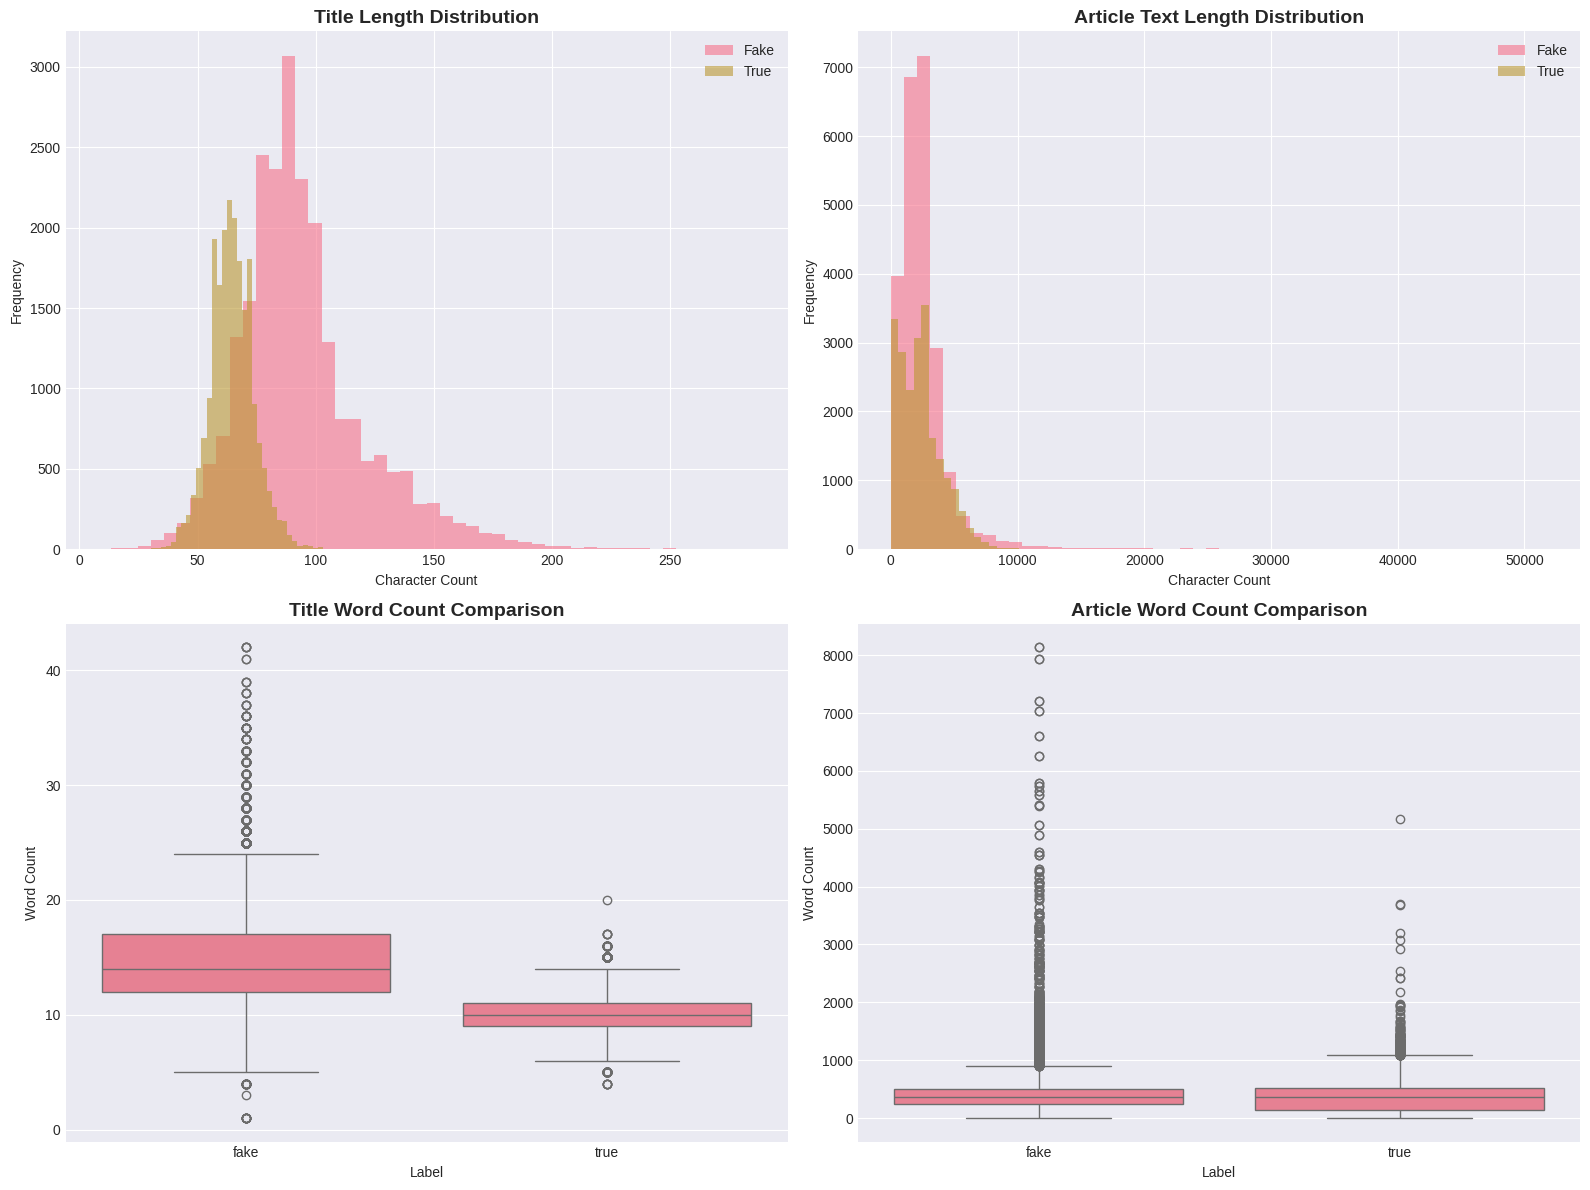

In [12]:
# Text length comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Title length distribution
for label in ['fake', 'true']:
    data = df[df['label'] == label]['title_length']
    axes[0, 0].hist(data, bins=50, alpha=0.6, label=label.capitalize())
axes[0, 0].set_title('Title Length Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Text length distribution
for label in ['fake', 'true']:
    data = df[df['label'] == label]['text_length']
    axes[0, 1].hist(data, bins=50, alpha=0.6, label=label.capitalize())
axes[0, 1].set_title('Article Text Length Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Character Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Title word count
sns.boxplot(data=df, x='label', y='title_word_count', ax=axes[1, 0])
axes[1, 0].set_title('Title Word Count Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Word Count')

# Text word count
sns.boxplot(data=df, x='label', y='text_word_count', ax=axes[1, 1])
axes[1, 1].set_title('Article Word Count Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Label')
axes[1, 1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

## 4. Text Analysis


=== SUBJECT DISTRIBUTION ===
subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


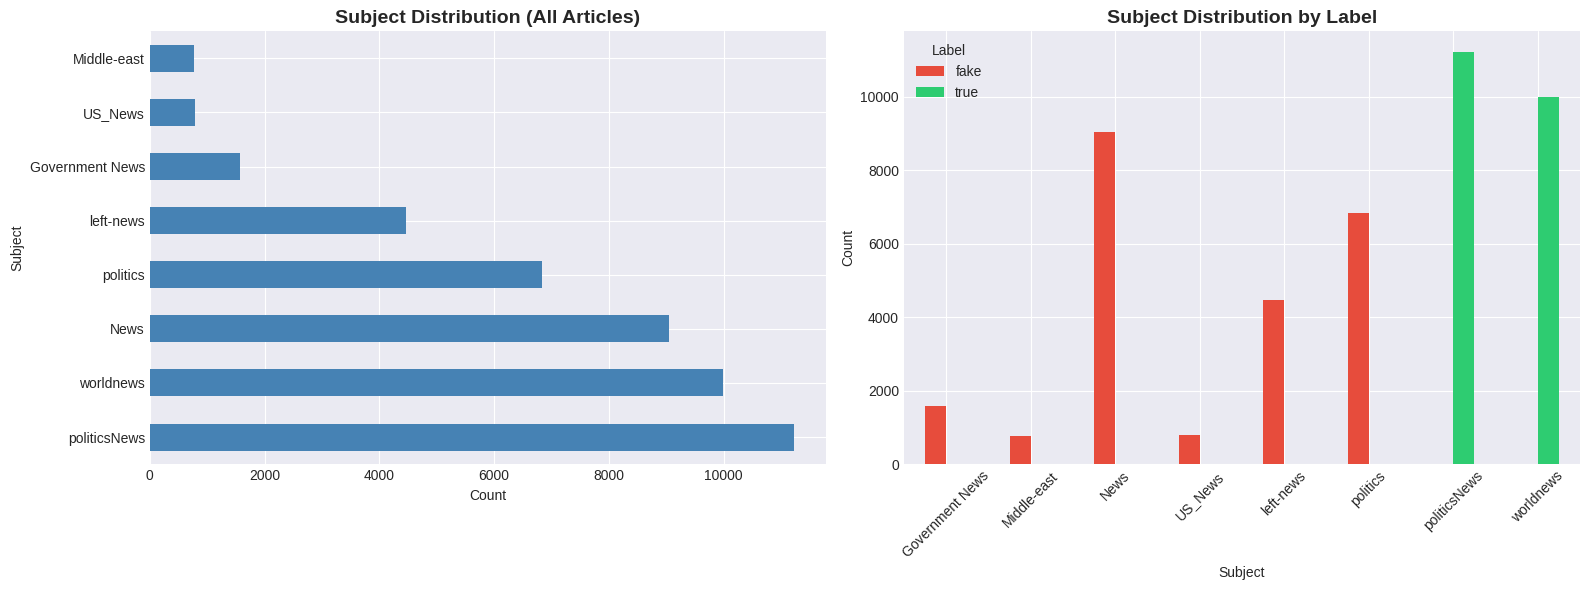

In [13]:
# Subject distribution
print("\n=== SUBJECT DISTRIBUTION ===")
subject_counts = df['subject'].value_counts()
print(subject_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall subject distribution
subject_counts.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Subject Distribution (All Articles)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Subject')

# Subject by label
subject_label = pd.crosstab(df['subject'], df['label'])
subject_label.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Subject Distribution by Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Subject')
axes[1].set_ylabel('Count')
axes[1].legend(title='Label')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

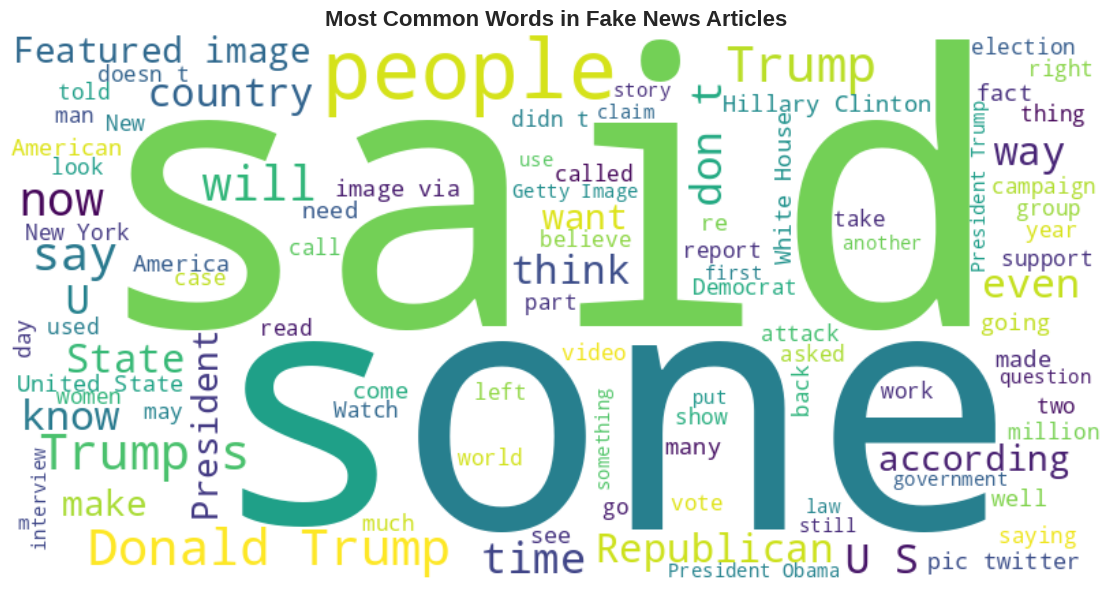

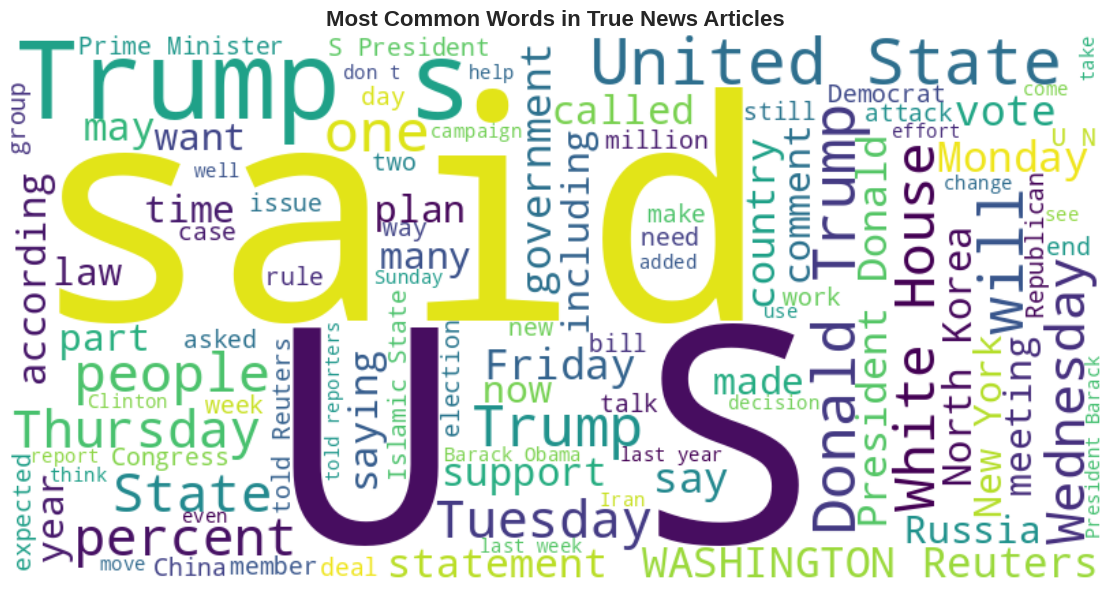

In [14]:
# Word clouds
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, colormap='viridis').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Combine all text for fake news
fake_text = ' '.join(df[df['label'] == 'fake']['text'].astype(str))
create_wordcloud(fake_text, 'Most Common Words in Fake News Articles')

# Combine all text for true news
true_text = ' '.join(df[df['label'] == 'true']['text'].astype(str))
create_wordcloud(true_text, 'Most Common Words in True News Articles')

Calculating sentiment scores... (this may take a few minutes)


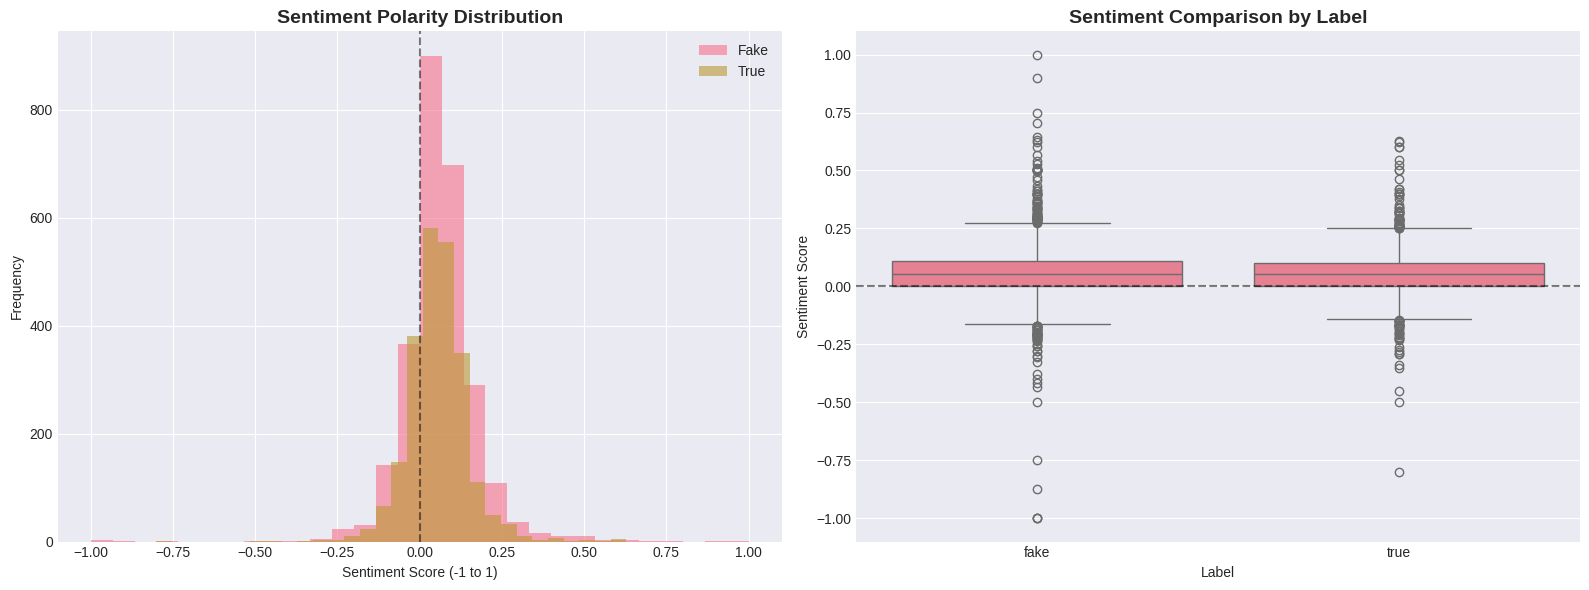


=== AVERAGE SENTIMENT SCORES ===
        count      mean       std  min       25%       50%       75%       max
label                                                                         
fake   2653.0  0.058349  0.116413 -1.0  0.000000  0.054167  0.109470  1.000000
true   2347.0  0.054906  0.092903 -0.8  0.003813  0.054489  0.102504  0.628571


In [15]:
# Sentiment analysis
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

print("Calculating sentiment scores... (this may take a few minutes)")
# Sample for faster processing
sample_df = df.sample(n=min(5000, len(df)), random_state=42)
sample_df['sentiment'] = sample_df['text'].apply(get_sentiment)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sentiment distribution
for label in ['fake', 'true']:
    data = sample_df[sample_df['label'] == label]['sentiment']
    axes[0].hist(data, bins=30, alpha=0.6, label=label.capitalize())
axes[0].set_title('Sentiment Polarity Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Box plot
sns.boxplot(data=sample_df, x='label', y='sentiment', ax=axes[1])
axes[1].set_title('Sentiment Comparison by Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Sentiment Score')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n=== AVERAGE SENTIMENT SCORES ===")
print(sample_df.groupby('label')['sentiment'].describe())

## 5. Temporal Analysis

In [16]:
# Remove rows with invalid dates
df_temporal = df[df['date'].notna()].copy()

# Extract temporal features
df_temporal['year'] = df_temporal['date'].dt.year
df_temporal['month'] = df_temporal['date'].dt.month
df_temporal['year_month'] = df_temporal['date'].dt.to_period('M')

print(f"\nDate range: {df_temporal['date'].min()} to {df_temporal['date'].max()}")


Date range: 2015-05-01 00:00:00 to 2017-12-31 00:00:00


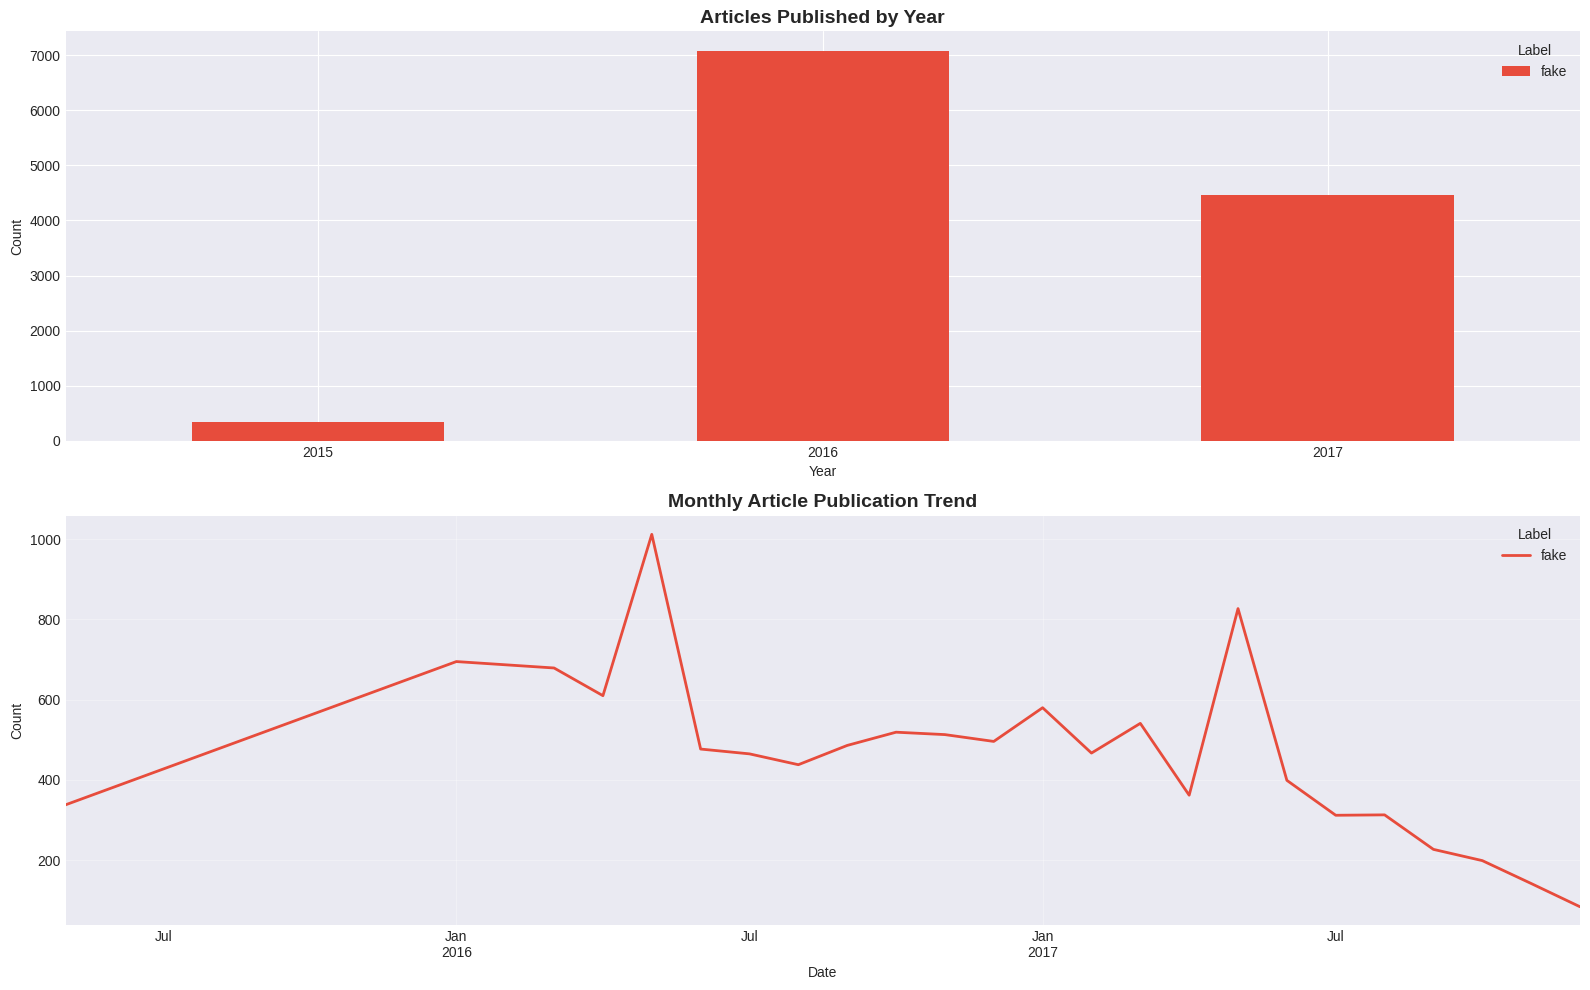

In [17]:
# Articles over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# By year
year_label = pd.crosstab(df_temporal['year'], df_temporal['label'])
year_label.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Articles Published by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].legend(title='Label')
axes[0].tick_params(axis='x', rotation=0)

# By month (time series)
monthly = df_temporal.groupby(['year_month', 'label']).size().unstack(fill_value=0)
monthly.plot(ax=axes[1], color=['#e74c3c', '#2ecc71'], linewidth=2)
axes[1].set_title('Monthly Article Publication Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].legend(title='Label')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Advanced Visualizations

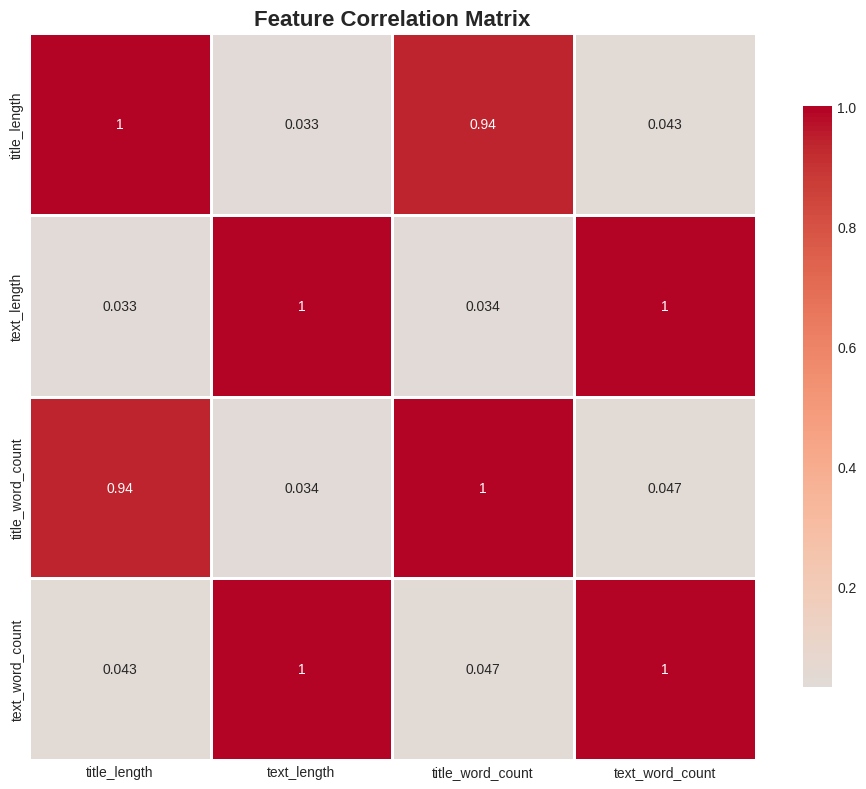

In [18]:
# Correlation heatmap
numeric_cols = ['title_length', 'text_length', 'title_word_count', 'text_word_count']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

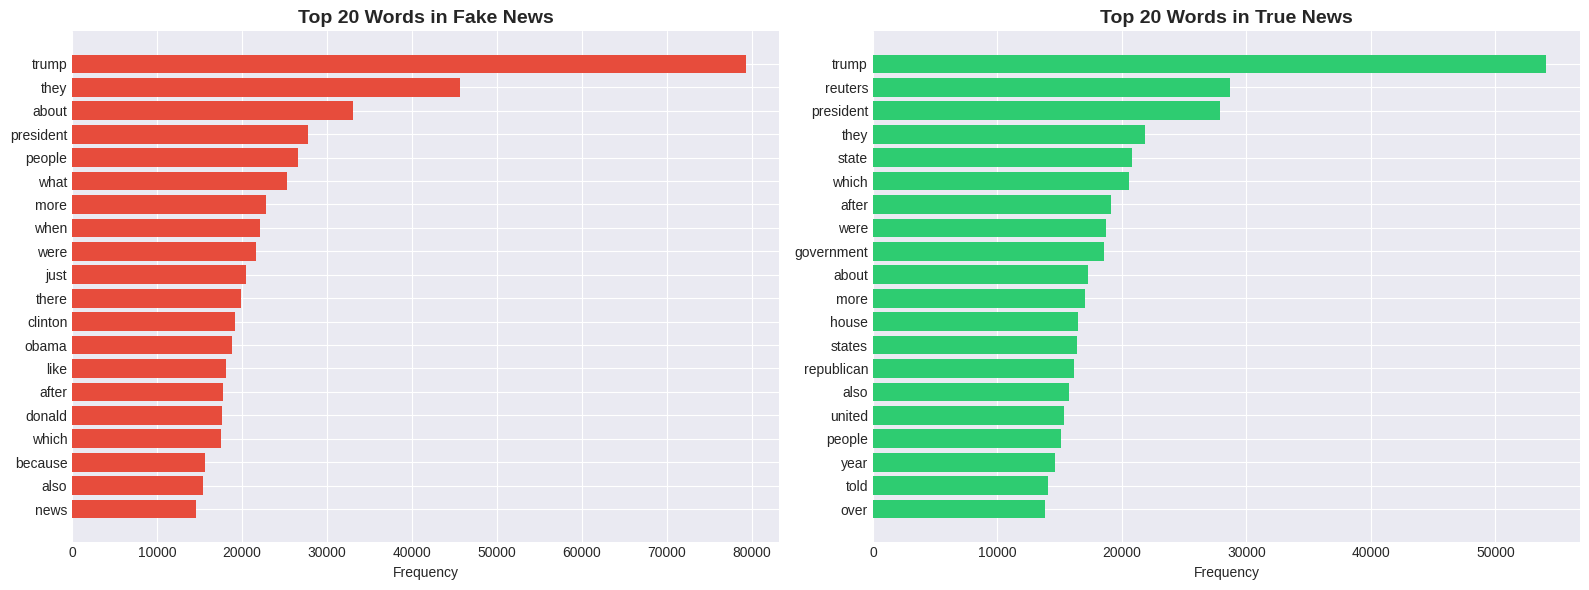

In [19]:
# Top words analysis
from collections import Counter
import re

def get_top_words(text_series, n=20):
    all_text = ' '.join(text_series.astype(str)).lower()
    words = re.findall(r'\b[a-z]{4,}\b', all_text)
    # Remove common stopwords
    stopwords = {'that', 'this', 'with', 'from', 'have', 'been', 'will', 'their', 'said', 'would'}
    words = [w for w in words if w not in stopwords]
    return Counter(words).most_common(n)

fake_top = get_top_words(df[df['label'] == 'fake']['text'])
true_top = get_top_words(df[df['label'] == 'true']['text'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Fake news top words
fake_words, fake_counts = zip(*fake_top)
axes[0].barh(range(len(fake_words)), fake_counts, color='#e74c3c')
axes[0].set_yticks(range(len(fake_words)))
axes[0].set_yticklabels(fake_words)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Words in Fake News', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# True news top words
true_words, true_counts = zip(*true_top)
axes[1].barh(range(len(true_words)), true_counts, color='#2ecc71')
axes[1].set_yticks(range(len(true_words)))
axes[1].set_yticklabels(true_words)
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 20 Words in True News', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 7. Conclusions & Insights

### Key Findings:

#### 1. **Dataset Composition**
- The dataset contains a relatively balanced distribution of fake and true news articles
- Articles span multiple subjects including politics, world news, government, and more

#### 2. **Text Characteristics**
- **Length Differences**: Fake and true news articles show different patterns in text length
- **Word Count**: There are observable differences in verbosity between fake and true articles
- **Subject Coverage**: Certain subjects appear more frequently in fake news (politics) vs true news (world news)

#### 3. **Temporal Patterns**
- Articles are concentrated in specific time periods
- Publication frequency varies by year and month
- Certain events may correlate with spikes in fake news

#### 4. **Sentiment Analysis**
- Fake and true news articles show different sentiment distributions
- Fake news tends to have more extreme sentiment (either more positive or more negative)
- True news generally maintains more neutral sentiment

#### 5. **Vocabulary Patterns**
- Different word frequencies between fake and true news
- Fake news may use more sensational or emotional language
- True news uses more formal and specific terminology

In [20]:
# Summary statistics table
print("\n" + "="*80)
print("FINAL SUMMARY STATISTICS")
print("="*80)

summary_stats = df.groupby('label').agg({
    'title': 'count',
    'title_length': ['mean', 'std'],
    'text_length': ['mean', 'std'],
    'title_word_count': ['mean', 'std'],
    'text_word_count': ['mean', 'std']
}).round(2)

print(summary_stats)
print("\n" + "="*80)
print("EDA COMPLETE!")
print("="*80)


FINAL SUMMARY STATISTICS
       title title_length        text_length          title_word_count        \
       count         mean    std        mean      std             mean   std   
label                                                                          
fake   23478        94.19  27.18     2547.56  2533.00            14.73  4.34   
true   21211        64.66   9.16     2378.04  1684.47             9.95  1.70   

      text_word_count          
                 mean     std  
label                          
fake           423.22  408.41  
true           384.76  273.91  

EDA COMPLETE!
